In [1]:
import pandas as pd
import numpy as np
import pickle

# K-Nearest Neighbors

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

A supervised machine learning algorithm (as opposed to an unsupervised machine learning algorithm) is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.

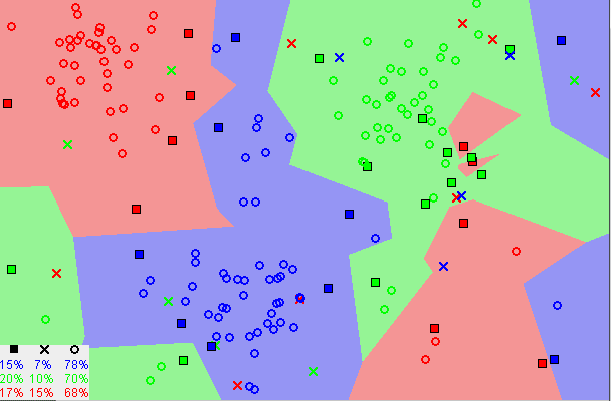

1. Introduction
Gradient descent (GD) is an iterative first-order optimisation algorithm used to find a local minimum/maximum of a given function. This method is commonly used in machine learning (ML) and deep learning(DL) to minimise a cost/loss function (e.g. in a linear regression). Due to its importance and ease of implementation, this algorithm is usually taught at the beginning of almost all machine learning courses.

However, its use is not limited to ML/DL only, it’s being widely used also in areas like:

control engineering (robotics, chemical, etc.)
computer games
mechanical engineering
That’s why today we will get a deep dive into the math, implementation and behaviour of first-order gradient descent algorithm. We will navigate the custom (cost) function directly to find its minimum, so there will be no underlying data like in typical ML tutorials — we will be more flexible in terms of a function’s shape.

This method was proposed before the era of modern computers and there was an intensive development meantime which led to numerous improved versions of it but in this article, we’re going to use a basic/vanilla gradient descent implemented in Python.

2. Function requirements
Gradient descent algorithm does not work for all functions. There are two specific requirements. A function has to be:

differentiable
convex
First, what does it mean it has to be differentiable? If a function is differentiable it has a derivative for each point in its domain — not all functions meet these criteria. First, let’s see some examples of functions meeting this criterion:

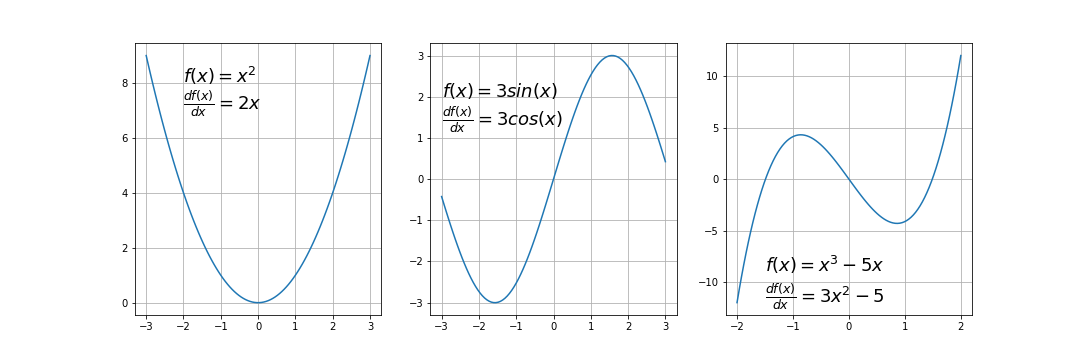
Examples of differentiable functions; Image by author
Typical non-differentiable functions have a step a cusp or a discontinuity:

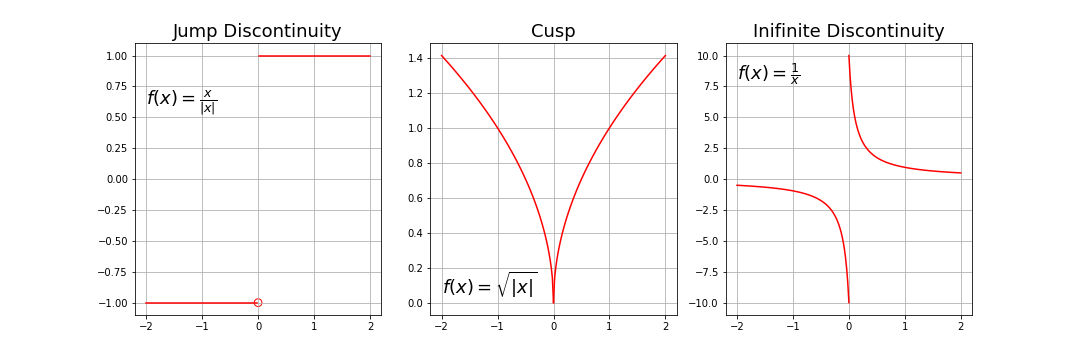
Examples of non-differentiable functions; Image by author
Next requirement — function has to be convex. For a univariate function, this means that the line segment connecting two function’s points lays on or above its curve (it does not cross it). If it does it means that it has a local minimum which is not a global one.

Mathematically, for two points x₁, x₂ laying on the function’s curve this condition is expressed as:


where λ denotes a point’s location on a section line and its value has to be between 0 (left point) and 1 (right point), e.g. λ=0.5 means a location in the middle.

Below there are two functions with exemplary section lines.

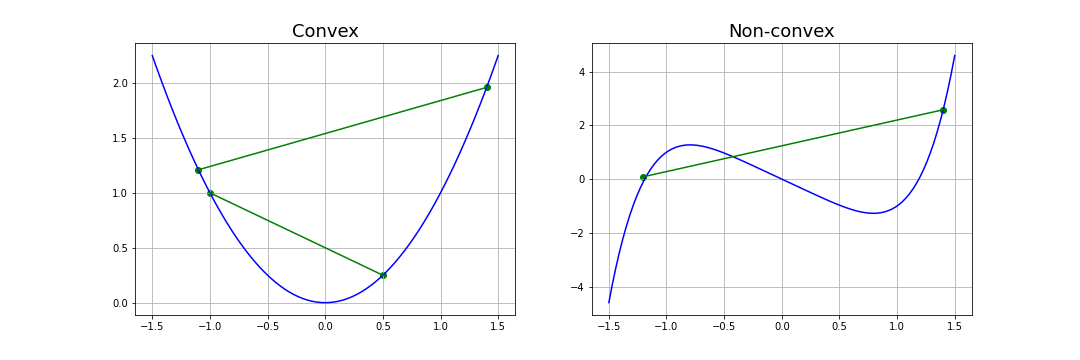
Exemplary convex and non-convex functions; Image by author
Another way to check mathematically if a univariate function is convex is to calculate the second derivative and check if its value is always bigger than 0.

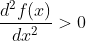
Let’s do a simple example (warning: calculus ahead!).


GIF via giphy
Let’s investigate a simple quadratic function given by:


Its first and second derivative are:

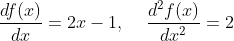
Because the second derivative is always bigger than 0, our function is strictly convex.

It is also possible to use quasi-convex functions with a gradient descent algorithm. However, often they have so-called saddle points (called also minimax points) where the algorithm can get stuck (we will demonstrate it later in the article). An example of a quasi-convex function is:
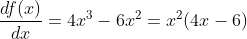


Let’s stop here for a moment. We see that the first derivative equal zero at x=0 and x=1.5. This places are candidates for function’s extrema (minimum or maximum )— the slope is zero there. But first we have to check the second derivative first.
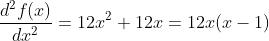

The value of this expression is zero for x=0 and x=1. These locations are called an inflexion point — a place where the curvature changes sign — meaning it changes from convex to concave or vice-versa. By analysing this equation we conclude that :

for x<0: function is convex
for 0<x<1: function is concave
for x>1: function is convex again
Now we see that point x=0 has both first and second derivate equal to zero meaning this is a saddle point and point x=1.5 is a global minimum.

Let’s look at the graph of this function. As calculated before a saddle point is at x=0 and minimum at x=1.5.
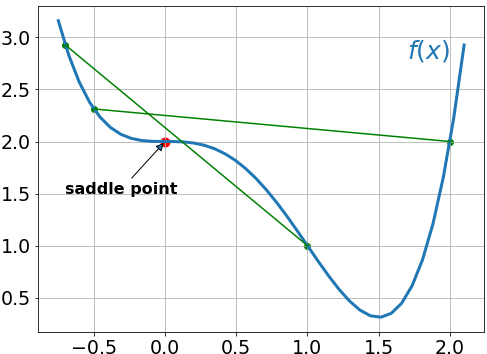

Semi-convex function with a saddle point; Image by author
For multivariate functions the most appropriate check if a point is a saddle point is to calculate a Hessian matrix which involves a bit more complex calculations and is beyond the scope of this article.

Example of a saddle point in a bivariate function is show below.
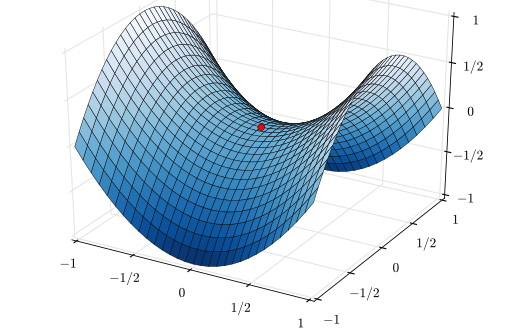


Nicoguaro, CC BY 3.0, via Wikimedia Commons
3. Gradient
Before jumping into code one more thing has to be explained — what is a gradient. Intuitively it is a slope of a curve at a given point in a specified direction.

In the case of a univariate function, it is simply the first derivative at a selected point. In the case of a multivariate function, it is a vector of derivatives in each main direction (along variable axes). Because we are interested only in a slope along one axis and we don’t care about others these derivatives are called partial derivatives.

A gradient for an n-dimensional function f(x) at a given point p is defined as follows:

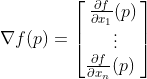
The upside-down triangle is a so-called nabla symbol and you read it “del”. To better understand how to calculate it let’s do a hand calculation for an exemplary 2-dimensional function below.


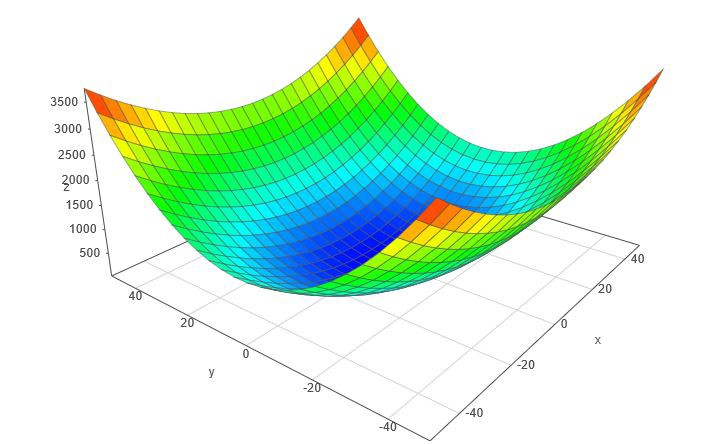
3D plot; Image by author
Let’s assume we are interested in a gradient at point p(10,10):

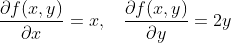
so consequently:

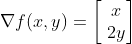

By looking at these values we conclude that the slope is twice steeper along the y axis.

4. Gradient Descent Algorithm
Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, then scales it (by a learning rate) and subtracts obtained value from the current position (makes a step). It subtracts the value because we want to minimise the function (to maximise it would be adding). This process can be written as:


There’s an important parameter η which scales the gradient and thus controls the step size. In machine learning, it is called learning rate and have a strong influence on performance.

The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point
If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.
In summary, Gradient Descent method’s steps are:

choose a starting point (initialisation)
calculate gradient at this point
make a scaled step in the opposite direction to the gradient (objective: minimise)
repeat points 2 and 3 until one of the criteria is met:
maximum number of iterations reached
step size is smaller than the tolerance.

In [2]:
with open('digits.txt','rb') as f:
    data = pickle.load(f)
X = data['data']
y = data['target']
dim = 8

In [3]:
X[0].reshape((dim,dim)), y[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

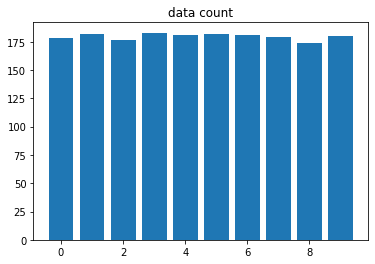

In [4]:
import matplotlib.pyplot as plt
num_count = pd.value_counts(y).sort_index()
plt.bar(list(num_count.index),list(num_count.values))
plt.title('data count')
plt.show()

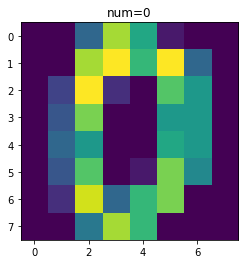

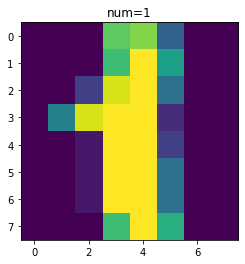

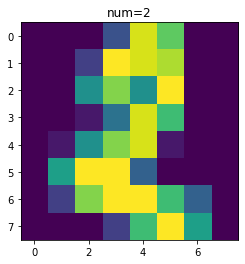

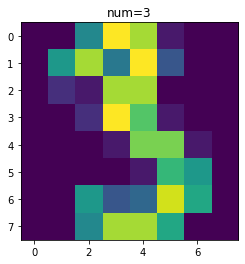

In [5]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.imshow(X[i].reshape((dim,dim)))
    plt.title('num=%s'%y[i])
    plt.show()


### The KNN Algorithm:

1. Load the data

2. Initialize K to your chosen number of neighbors

3. For each example in the data


    3.1 Calculate the distance between the query example and the current example from the data.

    3.2 Add the distance and the index of the example to an ordered collection
    

4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances

5. Pick the first K entries from the sorted collection

6. Get the labels of the selected K entries

7. If regression, return the mean of the K labels

8. If classification, return the mode of the K labels

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class myRegressionTree:
    def __init__(self):
        '''
        buildmodel
        '''
        self.clf = KNeighborsClassifier()


    def train(self, X, y):
        '''
        train
        :param X:
        :param y:
        :return:
        '''
        self.clf = self.clf.fit(X, y)
        return self.clf

    def predict(self, X):
        '''
        predict
        :param X:
        :return:
        '''
        return self.clf.predict(X)
    
    def predict_prob(self, X):
        '''
        predict prob
        '''
        return self.clf.predict_proba(X)

In [7]:
def eval_result(y, pre_y):
    '''
    eval
    :param y:
    :param pre_y:
    :return:
    '''
    lables = list(set(y))
    result = dict()
    for l in lables:
        t_r = dict()
        TP = np.logical_and(y==pre_y, y==l).sum()
        FP = np.logical_and(y!=pre_y, y!=l).sum()
        FN = np.logical_and(y!=pre_y, y==l).sum()
        t_r['precision'] = TP/(TP+FP)
        t_r['recall'] = TP/(TP+FN)
        t_r['F1'] = 2*t_r['precision']*t_r['recall']/(t_r['precision']+t_r['recall'])

        result[l] = t_r
    return result

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [9]:
model = myRegressionTree()
model.train(X_train,y_train)


KNeighborsClassifier()

In [10]:
pre_y_train = model.predict(X_train)
eval_train = eval_result(y_train, pre_y_train)
eval_train

{0: {'precision': 0.8881578947368421, 'recall': 1.0, 'F1': 0.9407665505226481},
 1: {'precision': 0.8963414634146342, 'recall': 1.0, 'F1': 0.9453376205787781},
 2: {'precision': 0.8924050632911392, 'recall': 1.0, 'F1': 0.9431438127090301},
 3: {'precision': 0.9032258064516129,
  'recall': 0.9859154929577465,
  'F1': 0.9427609427609427},
 4: {'precision': 0.89375, 'recall': 1.0, 'F1': 0.9438943894389439},
 5: {'precision': 0.9090909090909091,
  'recall': 0.9868421052631579,
  'F1': 0.9463722397476341},
 6: {'precision': 0.8944099378881988, 'recall': 1.0, 'F1': 0.9442622950819672},
 7: {'precision': 0.8930817610062893, 'recall': 1.0, 'F1': 0.9435215946843853},
 8: {'precision': 0.9266666666666666,
  'recall': 0.9586206896551724,
  'F1': 0.9423728813559322},
 9: {'precision': 0.9328859060402684,
  'recall': 0.952054794520548,
  'F1': 0.9423728813559323}}

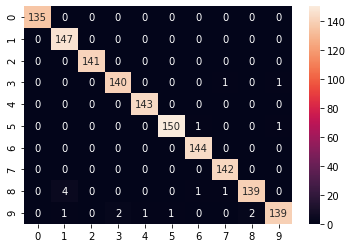

In [11]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels=None, save_path = './confusion_matrix.jpg'):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig(save_path)
    plt.show()

confusion_matrix(y_train, pre_y_train, list(range(10)), save_path='./train_confusion_matrix.jpg')

In [12]:
pre_y_test = model.predict(X_test)
prob_y_test = model.predict_prob(X_test)
eval_test = eval_result(y_test, pre_y_test)
eval_test

{0: {'precision': 0.9555555555555556, 'recall': 1.0, 'F1': 0.9772727272727273},
 1: {'precision': 0.9459459459459459, 'recall': 1.0, 'F1': 0.9722222222222222},
 2: {'precision': 0.9722222222222222,
  'recall': 0.9722222222222222,
  'F1': 0.9722222222222222},
 3: {'precision': 0.9534883720930233, 'recall': 1.0, 'F1': 0.9761904761904763},
 4: {'precision': 0.95, 'recall': 1.0, 'F1': 0.9743589743589743},
 5: {'precision': 0.9375, 'recall': 1.0, 'F1': 0.967741935483871},
 6: {'precision': 0.9487179487179487, 'recall': 1.0, 'F1': 0.9736842105263158},
 7: {'precision': 0.972972972972973,
  'recall': 0.972972972972973,
  'F1': 0.972972972972973},
 8: {'precision': 0.9354838709677419, 'recall': 1.0, 'F1': 0.9666666666666666},
 9: {'precision': 0.9444444444444444, 'recall': 1.0, 'F1': 0.9714285714285714}}

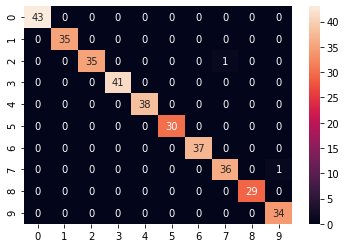

In [15]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels=None, save_path = './confusion_matrix.jpg'):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig(save_path)
    plt.show()

confusion_matrix(y_test, pre_y_test, list(range(10)), save_path='./test_confusion_matrix.jpg')

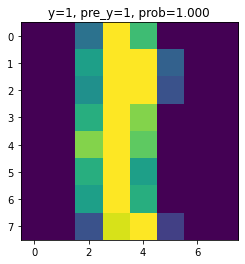

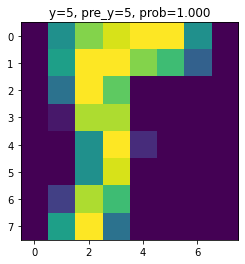

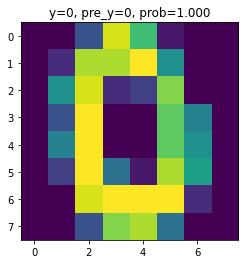

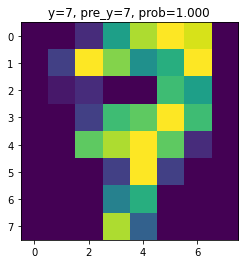

In [14]:
for i in range(4):
    plt.imshow(X_test[i].reshape((dim,dim)))
    plt.title('y=%s, pre_y=%s, prob=%.3f'%(y_test[i], pre_y_test[i], prob_y_test[i][y_test[i]]))
    plt.show()